# Loan Application Status Prediction

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
import missingno as msno
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 1. Gathering Data

In [2]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [4]:
Loan_data=df

In [5]:
Loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
Loan_data_columns = Loan_data.columns # assign to a variable
Loan_data_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Loan_data Key Information

Loan_ID--------------> Unique Loan ID.

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)

# 2. Exploratory Data Analysis

Target Variable - Loan Status

Y    422
N    192
Name: Loan_Status, dtype: int64

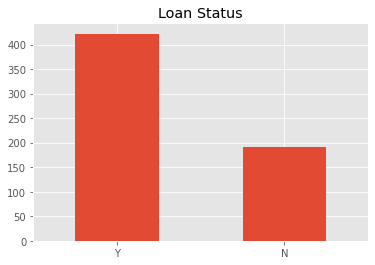

In [10]:
plt.style.use('ggplot')
Loan_data['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(Loan_data['Loan_Status'].value_counts())

# Ordinal Features

Number of Dependents

Education Level

Property or Area Background

# Our Visual Analysis below, indecates that:

Almost 58% of the applicants have no dependents.

Highest number of applicants are from Semi Urban areas, followed by urban areas.

Around 80 % of the applicants are Graduate.

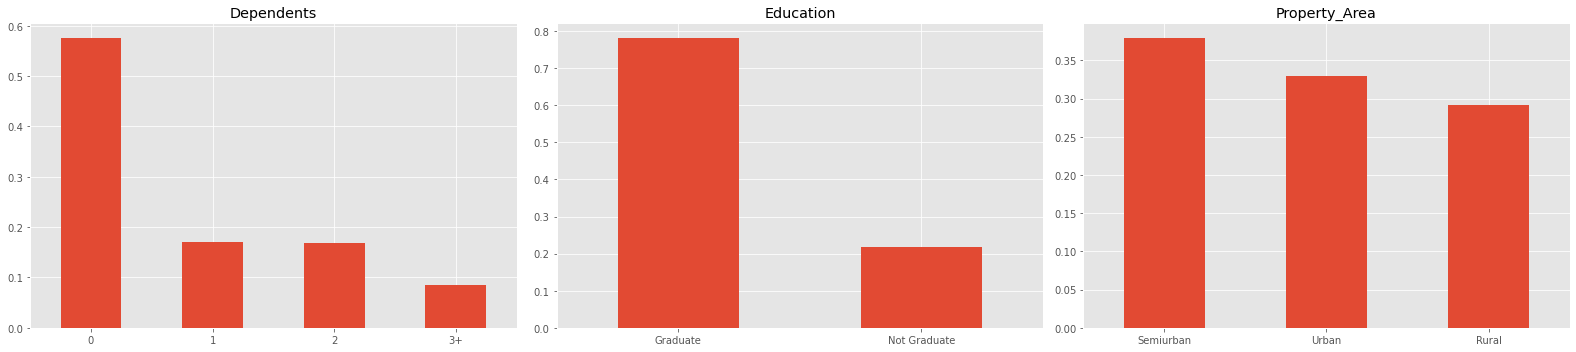

In [11]:
fig2, ax2= plt.subplots(1,3)


Loan_data['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

Loan_data['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

Loan_data['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)

fig2.tight_layout()

# Numerical Features

The Applicant's Income

The Co-Applicant's Income

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

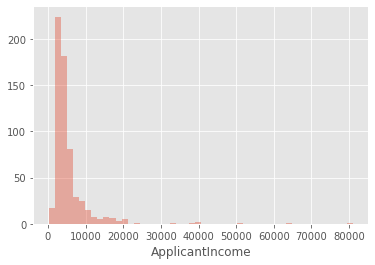

In [12]:
sns.distplot(Loan_data.ApplicantIncome,kde=False)

<AxesSubplot:xlabel='ApplicantIncome'>

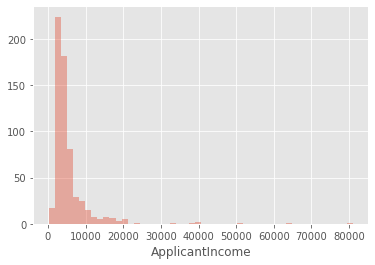

In [13]:
sns.distplot(Loan_data.ApplicantIncome.dropna(),kde=False)

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

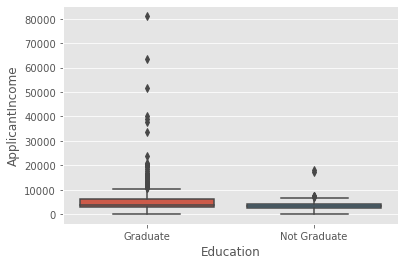

In [14]:
sns.boxplot(x='Education',y='ApplicantIncome',data=Loan_data)

In [15]:
Loan_data

Loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

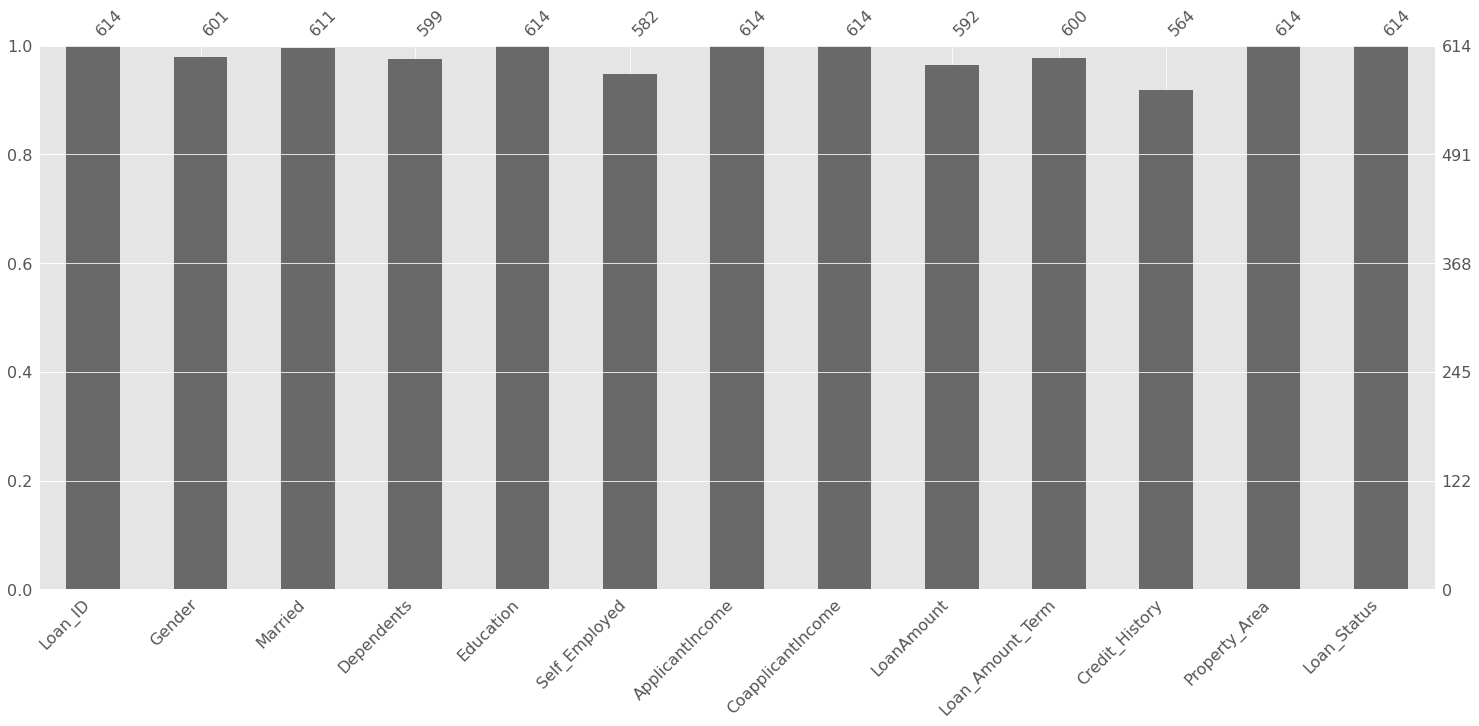

In [16]:
msno.bar(Loan_data)

<AxesSubplot:>

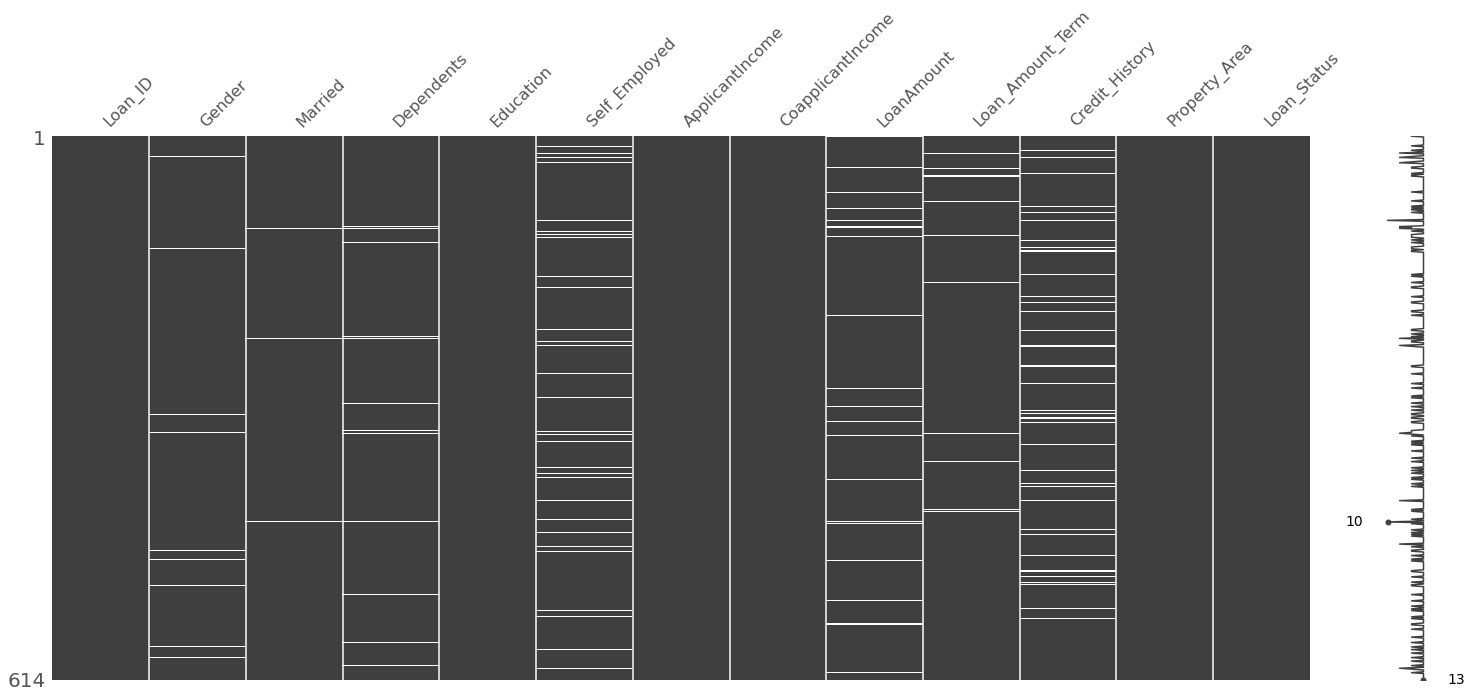

In [17]:
msno.matrix(Loan_data)

In [18]:
Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mode(), inplace=True)

Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].mean(), inplace=True)

In [19]:
bins= [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very high']
Loan_data['Income_bin']=pd.cut(Loan_data['ApplicantIncome'],bins,labels=group)
Loan_data['Income_bin']

0           High
1           High
2        Average
3        Average
4           High
         ...    
609      Average
610         High
611    Very high
612    Very high
613         High
Name: Income_bin, Length: 614, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very high']

In [20]:
#turn loan status into binary 
modified=Loan_data
modified['Loan_Status']=Loan_data['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

# 3. Data preprocessing:

In [21]:
Loan_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
dtype: int64

In [22]:
#categorical
Loan_data['Gender'].fillna(Loan_data['Gender'].mode()[0], inplace=True)
Loan_data['Married'].fillna(Loan_data['Married'].mode()[0], inplace=True)
Loan_data['Dependents'].fillna(Loan_data['Dependents'].mode()[0], inplace=True)
Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mode()[0], inplace=True)
Loan_data['Self_Employed'].fillna(Loan_data['Self_Employed'].mode()[0], inplace=True)


#numerical
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [23]:
Loan_data['LoanAmount_log']=np.log(Loan_data['LoanAmount'])
Loan_data['TotalIncome']= Loan_data['ApplicantIncome']+Loan_data['CoapplicantIncome']
Loan_data['TotalIncome_log']=np.log(Loan_data['TotalIncome'])

In [24]:
Loan_data['LoanAmount_log']

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount_log, Length: 614, dtype: float64

In [25]:
Loan_data['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64

In [26]:
Loan_data['TotalIncome_log']

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: TotalIncome_log, Length: 614, dtype: float64

# Visualizing correlation via Headmap

The variables with darker color means their correlation is more

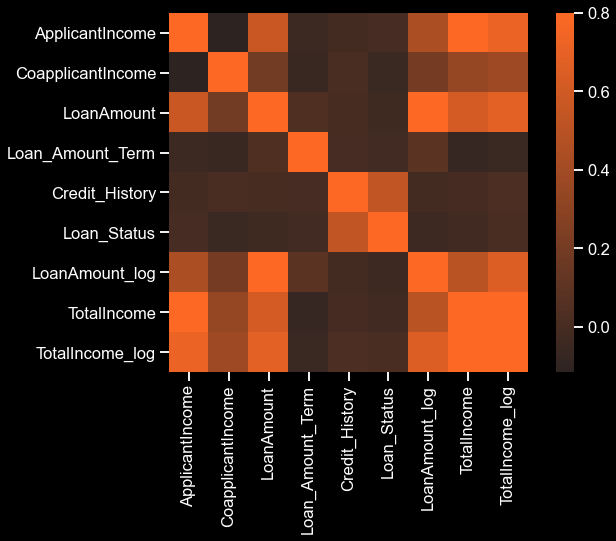

In [27]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
matrix= Loan_data.corr() 
fig, ax = plt.subplots(figsize=(9,6))
cmap = sns.dark_palette("#fd6925", as_cmap=True)
fig.tight_layout()
HeatM = sns.heatmap(matrix,vmax=.8,square=True, cmap=cmap)
plt.rcParams['figure.figsize']=(10,10)
fig = HeatM.get_figure()
fig.savefig('output.png', transparent=True)

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome

In [28]:
np.corrcoef(Loan_data['LoanAmount'], Loan_data['ApplicantIncome'])

array([[1.        , 0.56562046],
       [0.56562046, 1.        ]])

correlation between loan amount and applicant income is 56%

In [29]:
np.corrcoef(Loan_data['LoanAmount'], Loan_data['CoapplicantIncome'])

array([[1.        , 0.18782839],
       [0.18782839, 1.        ]])

correlation between loan amount and coapplicant income is 19 %

# Outlier Treatment

Due to outliers in the Loan Amount. the data in the loan amount is skewed towards the right, which means bulk of the data is towards the left. We remove this skewness by doing a log transformation. A log transformation doesn't effect affect the smaller values much but reduces the larger values. So the distribution becomes normal

<AxesSubplot:>

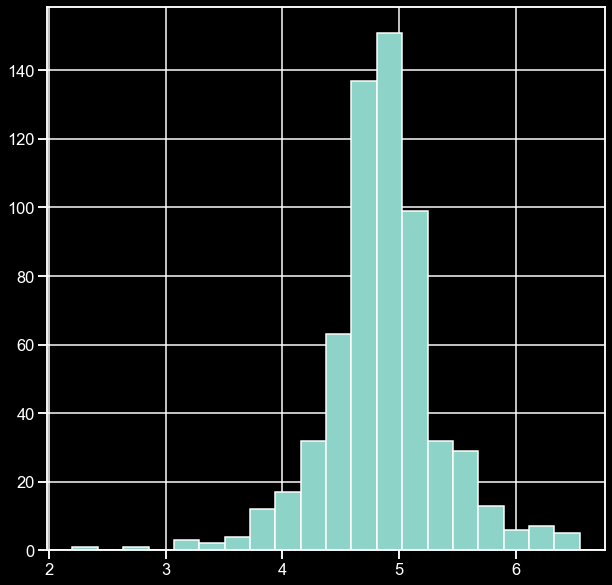

In [30]:
y=Loan_data.Loan_Status
Loan_data_V1=Loan_data.drop('Loan_Status',1)
Loan_data['LoanAmount_log']=np.log(Loan_data['LoanAmount'])
Loan_data['LoanAmount_log'].hist(bins=20)

# Conclusion:

We did Exploratory data Analysis on the features of this dataset and saw how each feature is distributed.

We did bivariate and multivariate analysis to see imapct of one another on their features using charts.

We analysed each variable to check if data is cleaned and normally distributed.

We cleaned the data and removed NA values

We also generated hypothesis to prove an associationamong the Independent variables and the Target variable. And based on the results, we assumed whether or not there is an association.

We calculated correaltion between independent variables and found that applicant income and loan amount have significant relation.

We created dummy variables for constructing the model

We constructed models taking different variables into account and found through odds ratio that credit credit history is creating the most impact on loan giving decision

Finally, we got a model with coapplicant income and credit history as independent variable with highest accuracy.

We tested the data and got the accuracy of 83 %